In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

#For local jum002 HPC setup
import sys
sys.path.append("/home/jum002/store5/repo/smrt_fork/smrt")
sys.path.append("/home/jum002/store5/repo/snowmicropyn")

# From https://github.com/tsutterley/read-cryosat-2
# quick fix to add baseline E
# use the file read_cryosat_L1b_modif_CB22.py
import read_cryosat_L1b_modif_CB22 as read_cryo
import akross_common_functions as AK

In [23]:
def get_waveform(filename, low_lat, high_lat):
    #get info for whole swath
    CS_L1b_mds = read_cryo.read_cryosat_L1b(filename)
    masked_coord = []
    wf2 = []
    for i in range(len(CS_L1b_mds['Waveform_1Hz']['Lat'])):
        #print (i,CS_L1b_mds['Location']['Second'][i,0] )
        if (CS_L1b_mds['Waveform_1Hz']['Lat'][i] >= low_lat*1e7) and (CS_L1b_mds['Waveform_1Hz']['Lat'][i] <= high_lat*1e7):
            masked_coord.append({'lat' : CS_L1b_mds['Waveform_1Hz']['Lat'].data[i]*1e-7, 
                                'lon' : CS_L1b_mds['Waveform_1Hz']['Lon'].data[i]*1e-7,
                                'alt' : CS_L1b_mds['Waveform_1Hz']['Alt'].data[i]} )
            wf2.append(CS_L1b_mds['Waveform_1Hz']['Waveform'].data[i] * 1e-9 * 
                    CS_L1b_mds['Waveform_1Hz']['Linear_Wfm_Multiplier'].data[i] * 
                    2.0**CS_L1b_mds['Waveform_1Hz']['Power2_Wfm_Multiplier'].data[i])


    return wf2

In [24]:
filename_CB = '/home/jum002/store5/data/AKROSS_data/CRYOSAT/CB22/CS_OFFL_SIR_SIN_1B_20220424T103346_20220424T103735_E001.nc'
filename_E22 = '/home/jum002/store5/data/AKROSS_data/CRYOSAT/Eureka22/CS_OFFL_SIR_SIN_1B_20220422T085940_20220422T090109_E001.nc'
filename_A = '/home/jum002/store5/data/AKROSS_data/CRYOSAT/Alert/CS_LTA__SIR_SIN_1B_20170412T021004_20170412T021112_D001.nc' 
filename_E16 = '/home/jum002/store5/data/AKROSS_data/CRYOSAT/Eureka16/CS_LTA__SIR_SIN_1B_20160416T215153_20160416T215555_D001.nc'

In [25]:
# From 1Hz waveform info
# Mask1992 from AK site, AK1 : 69.08899 -> AK4 : 68.8216
CB_low_lat = 68.8
CB_high_lat = 69.09

E_low_lat = 80.2
E_high_lat = 80.6

A_low_lat = 83.44
A_high_lat = 88


CB_wf2 = get_waveform(filename_CB, CB_low_lat, CB_high_lat)
E22_wf2 = get_waveform(filename_E22, E_low_lat, E_high_lat)
A_wf2 = get_waveform(filename_A, A_low_lat, A_high_lat)
E16_wf2 = get_waveform(filename_E16, E_low_lat, E_high_lat)


### Align waveform to nominal gate of simulation

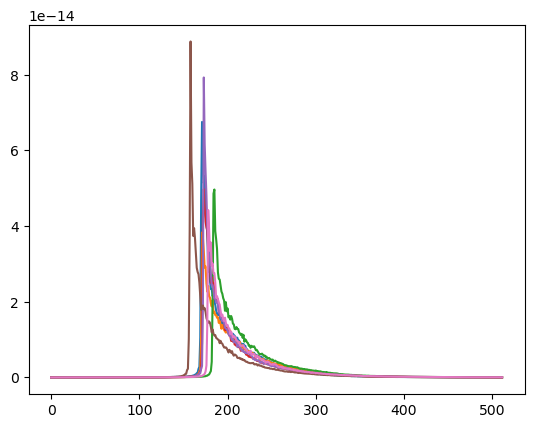

In [26]:
#plt.plot(wf2_mean)
#plt.plot(wfE22_mean)
for i in E22_wf2:
    plt.plot(i)

### Align waveform with simulation

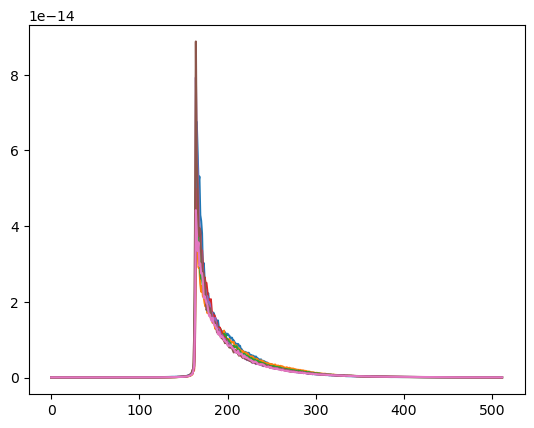

In [27]:
E22_wf2_align = [AK.align_waveform_with_sim(wave_obs) for wave_obs in E22_wf2]
for i in wf2_align:
    plt.plot(i)
# Calc mean waveform
wf2_mean = np.mean(E22_wf2_align, axis=0)

In [28]:
CB_wf2_align = [AK.align_waveform_with_sim(wave_obs) for wave_obs in CB_wf2]
A_wf2_align = [AK.align_waveform_with_sim(wave_obs) for wave_obs in A_wf2]
E16_wf2_align = [AK.align_waveform_with_sim(wave_obs) for wave_obs in E16_wf2]

In [29]:
# Calc mean waveform
E22_wf2_mean = np.mean(E22_wf2_align, axis=0)
CB_wf2_mean = np.mean(CB_wf2_align, axis=0)
A_wf2_mean = np.mean(A_wf2_align, axis=0)
E16_wf2_mean = np.mean(E16_wf2_align, axis=0)

In [33]:
E22_dict_obs = {'mean' : E22_wf2_mean, 'waveforms' : E22_wf2_align}
CB_dict_obs = {'mean' : CB_wf2_mean, 'waveforms' : CB_wf2_align}
A_dict_obs = {'mean' : A_wf2_mean, 'waveforms' : A_wf2_align}
E16_dict_obs = {'mean' : E16_wf2_mean, 'waveforms' : E16_wf2_align}

In [34]:
with open('smrt_in-out/observed_waveform_E22', 'wb') as pickle_file:
    pickle.dump(E22_dict_obs, pickle_file)

with open('smrt_in-out/observed_waveform_CB', 'wb') as pickle_file:
    pickle.dump(CB_dict_obs, pickle_file)

with open('smrt_in-out/observed_waveform_A', 'wb') as pickle_file:
    pickle.dump(A_dict_obs, pickle_file)

with open('smrt_in-out/observed_waveform_E16', 'wb') as pickle_file:
    pickle.dump(E16_dict_obs, pickle_file)